In [1]:
############################################################
### Notebook to visualize and analyze time to run user   ###
### apps inside and outside ResidueFree. Data and scripts###
### used to collect the data are in the user_performance ###
### folder                                               ###
############################################################

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import statistics

In [3]:
# Default MatPlotLib figure display options
def set_plot_options():
    options = {
        'backend': 'PDF',
        'font.size': 12,
        'figure.figsize': (4,2),
        'figure.dpi': 100.0,
        'figure.subplot.left': 0.20,
        'figure.subplot.right': 0.97,
        'figure.subplot.bottom': 0.20,
        'figure.subplot.top': 0.90,
        'grid.color': '0.1',
        'grid.linestyle': ':',
        #'grid.linewidth': 0.5,
        'axes.grid' : True,
        #'axes.grid.axis' : 'y',
        #'axes.axisbelow': True,
        'axes.titlesize' : 'medium',
        'axes.labelsize' : 'medium',
        'axes.formatter.limits': (-4,4),
        'xtick.labelsize' : 12,
        'ytick.labelsize' : 12,
        'lines.linewidth' : 2.0,
        'lines.markeredgewidth' : 0.5,
        'lines.markersize' : 10,
        'legend.fontsize' : 11,
        'legend.fancybox' : False,
        'legend.shadow' : False,
        'legend.borderaxespad' : 0.5,
        'legend.numpoints' : 1,
        'legend.handletextpad' : 0.5,
        'legend.handlelength' : 2.0,
        'legend.labelspacing' : .75,
        'legend.markerscale' : 1.0,
        # turn on the following to embedd fonts; requires latex
        'ps.useafm' : True,
        'pdf.use14corefonts' : True,
        'text.usetex' : True,
    }

    for option_key in options:
        matplotlib.rcParams[option_key] = options[option_key]

    if 'figure.max_num_figures' in matplotlib.rcParams:
        matplotlib.rcParams['figure.max_num_figures'] = 50
    if 'figure.max_open_warning' in matplotlib.rcParams:
        matplotlib.rcParams['figure.max_open_warning'] = 50
    if 'legend.ncol' in matplotlib.rcParams:
        matplotlib.rcParams['legend.ncol'] = 50



def plot():
    matplotlib.rcParams['figure.figsize'] = (7,3)
    

In [4]:
# Define file names where times are written

dir="user_performance/"
# Milliseconds (3 places): libreoffice & sftp
libre_string = dir+"libre_times.txt"
sftp_string = dir+"sftp_times.txt"
wget_string = dir+"wget_times.txt"

#Seconds
vlc_string = dir+"vlc_times.txt"

#Difference already recorded
firefox_string = dir+"firefox_times.txt"

tests_Baseline_Avgs = [] 
tests_Baseline_Stds = [] 
tests_Residue_Avgs = [] 
tests_Residue_Stds = [] 
tests_varnames = []
tests_boxplots = []

In [5]:
## Parse LibreOffice times

libre_file = open(libre_string,'r')

libre_lines = libre_file.read().splitlines()

standard = libre_lines[3:13]
residue = libre_lines[15:25]

libre_standard_diffs = np.array([])
libre_residue_diffs = np.array([])
#print(standard)
#print(residue)

# Convert milliseconds to seconds
for tmp in standard:
    tmp = list(map(int, tmp.split()))
    tmp = [float(i)/1000 for i in tmp] #convert to int
    libre_standard_diffs = np.append(libre_standard_diffs, tmp[1]-tmp[0])
    
for tmp in residue:
    tmp = list(map(int, tmp.split()))
    tmp = [float(i)/1000 for i in tmp] #convert to int
    libre_residue_diffs = np.append(libre_residue_diffs, tmp[1]-tmp[0])
    
#print(libre_standard_diffs)
#print(libre_residue_diffs)
Baseline = libre_standard_diffs
Residue = libre_residue_diffs

tests_Baseline_Avgs.append(np.mean(Baseline)) 
tests_Baseline_Stds.append(np.std(Baseline)) 
tests_Residue_Avgs.append(np.mean(Residue)) 
tests_Residue_Stds.append(np.std(Residue)) 
tests_varnames.append("LibreOffice")
tests_boxplots.append(Baseline)
tests_boxplots.append(Residue)

In [6]:
## Parse SFTP times

sftp_file = open(sftp_string,'r')

sftp_lines = sftp_file.read().splitlines()

standard = sftp_lines[3:13]
residue = sftp_lines[15:25]

sftp_standard_diffs = np.array([])
sftp_residue_diffs = np.array([])
#print(standard)
#print(residue)

# Convert milliseconds to seconds
for tmp in standard:
    tmp = list(map(int, tmp.split()))
    tmp = [float(i)/1000 for i in tmp] #convert to int
    sftp_standard_diffs = np.append(sftp_standard_diffs, tmp[1]-tmp[0])
    
for tmp in residue:
    tmp = list(map(int, tmp.split()))
    tmp = [float(i)/1000 for i in tmp] #convert to int
    sftp_residue_diffs = np.append(sftp_residue_diffs, tmp[1]-tmp[0])
    
#print(sftp_standard_diffs)
#print(sftp_residue_diffs)

Baseline = sftp_standard_diffs
Residue = sftp_residue_diffs

tests_Baseline_Avgs.append(np.mean(Baseline)) 
tests_Baseline_Stds.append(np.std(Baseline)) 
tests_Residue_Avgs.append(np.mean(Residue)) 
tests_Residue_Stds.append(np.std(Residue)) 
tests_varnames.append("SFTP")
tests_boxplots.append(Baseline)
tests_boxplots.append(Residue)

In [7]:
## Parse VLC Times

vlc_file = open(vlc_string,'r')

vlc_lines = vlc_file.read().splitlines()

standard = vlc_lines[3:13]
residue = vlc_lines[15:25]

vlc_standard_diffs = np.array([])
vlc_residue_diffs = np.array([])
#print(standard)
#print(residue)

for tmp in standard:
    tmp = list(map(int, tmp.split()))
    vlc_standard_diffs = np.append(vlc_standard_diffs, tmp[1]-tmp[0])
    
for tmp in residue:
    tmp = list(map(int, tmp.split()))
    vlc_residue_diffs = np.append(vlc_residue_diffs, tmp[1]-tmp[0])
    
#print(vlc_standard_diffs)
#print(vlc_residue_diffs)

Baseline = vlc_standard_diffs
Residue = vlc_residue_diffs

tests_Baseline_Avgs.append(np.mean(Baseline)) 
tests_Baseline_Stds.append(np.std(Baseline)) 
tests_Residue_Avgs.append(np.mean(Residue)) 
tests_Residue_Stds.append(np.std(Residue)) 
tests_varnames.append("VLC")
tests_boxplots.append(Baseline)
tests_boxplots.append(Residue)

In [8]:
# Parse WGET times

wget_file = open(wget_string,'r')

wget_lines = wget_file.read().splitlines()

standard = wget_lines[3:13]
residue = wget_lines[15:25]

wget_standard_diffs = np.array([])
wget_residue_diffs = np.array([])
#print(standard)
#print(residue)

# Milliseconds to seconds
for tmp in standard:
    tmp = tmp.split()[0:2]
    tmp = [int(i)/1000 for i in tmp]
    wget_standard_diffs = np.append(wget_standard_diffs, float(tmp[1])-float(tmp[0]))
    
for tmp in residue:
    tmp = tmp.split()[0:2]
    tmp = [int(i)/1000 for i in tmp]
    wget_residue_diffs = np.append(wget_residue_diffs, float(tmp[1])-float(tmp[0]))
    
#print(wget_standard_diffs)
#print(wget_residue_diffs)

Baseline = wget_standard_diffs
Residue = wget_residue_diffs

tests_Baseline_Avgs.append(np.mean(Baseline)) 
tests_Baseline_Stds.append(np.std(Baseline)) 
tests_Residue_Avgs.append(np.mean(Residue)) 
tests_Residue_Stds.append(np.std(Residue)) 
tests_varnames.append("Wget")
tests_boxplots.append(Baseline)
tests_boxplots.append(Residue)

In [9]:
firefox_file = open(firefox_string,'r')

firefox_lines = firefox_file.read().splitlines()

standard = firefox_lines[1:11]
residue = firefox_lines[13:23]

firefox_standard_diffs = np.array([])
firefox_residue_diffs = np.array([])
#print(standard)
#print(residue)

# Time differences were manually recorded from Selenium output
for tmp in standard:
    tmp = int(tmp)
    firefox_standard_diffs = np.append(firefox_standard_diffs, tmp)
    
for tmp in residue:
    tmp = int(tmp)
    firefox_residue_diffs = np.append(firefox_residue_diffs, tmp)
    
#print(firefox_standard_diffs)
#print(firefox_residue_diffs)

Baseline = firefox_standard_diffs
Residue = firefox_residue_diffs

tests_Baseline_Avgs.append(np.mean(Baseline)) 
tests_Baseline_Stds.append(np.std(Baseline)) 
tests_Residue_Avgs.append(np.mean(Residue)) 
tests_Residue_Stds.append(np.std(Residue)) 
tests_varnames.append("Firefox")
tests_boxplots.append(Baseline)
tests_boxplots.append(Residue)

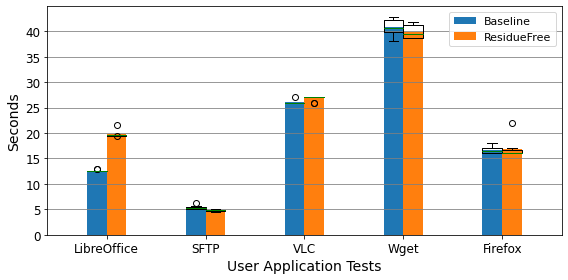

In [10]:
# Plot the times it took to run the user applications

fig, ax = plt.subplots() 
tests_ind = np.arange(len(tests_Baseline_Avgs)) 
tests_width = .2
Diff = tests_width/2
tests_ylabel = "Seconds"
tests_xlabel = "User Application Tests"

# Plot bar charts and boxplots showing distribution
postns = []
for pos in tests_ind:
    postns.append(pos-Diff)
    postns.append(pos+Diff)
tests_BarBase = ax.bar(tests_ind - Diff, tests_Baseline_Avgs, tests_width, label='Baseline') 
tests_BarRes = ax.bar(tests_ind + Diff, tests_Residue_Avgs, tests_width, label='ResidueFree')
ax.boxplot(tests_boxplots, positions=postns, widths=tests_width, medianprops=dict(color='green'))

# Set labels and formatting
ax.set_ylabel(tests_ylabel, fontsize=14)
ax.set_xlabel(tests_xlabel, fontsize=14)
ax.set_xticks(tests_ind)
xlabels = tests_varnames
ax.set_xticklabels(xlabels, fontsize=12) 
ax.legend( (tests_BarBase, tests_BarRes), ('Baseline','ResidueFree'), fontsize=11 )
plt.yticks(fontsize=12)

# Figure Display options
GRAPH_HEIGHT=4
fig.set_size_inches(8, GRAPH_HEIGHT, forward=True)
plt.grid(b=True,which="major",axis="y",color='gray')
fig.tight_layout() 
plt.style.use('tableau-colorblind10')
plt.savefig("./Figures/UserApps.pdf")
plt.show()

In [11]:
# Compare LibreOffice from ResidueFree to baseline times
print(np.mean(libre_residue_diffs))
print(np.mean(libre_standard_diffs))
print(np.mean(libre_residue_diffs)/np.mean(libre_standard_diffs))

19.72240002155304
12.594800019264222
1.5659160916717125


In [12]:
# Compare SFTP from ResidueFree to baseline times
print(np.mean(sftp_residue_diffs))
print(np.mean(sftp_standard_diffs))
print(np.mean(sftp_residue_diffs)/np.mean(sftp_standard_diffs))

4.8507000207901
5.379300045967102
0.9017344225717068


In [13]:
# Compare VLC from ResidueFree to baseline times
print(np.mean(vlc_residue_diffs))
print(np.mean(vlc_standard_diffs))
print(np.mean(vlc_residue_diffs)/np.mean(vlc_standard_diffs))

26.8
26.1
1.0268199233716475


In [14]:
# Compare wGET from ResidueFree to baseline times
print(np.mean(wget_residue_diffs))
print(np.mean(wget_standard_diffs))
print(np.mean(wget_residue_diffs)/np.mean(wget_standard_diffs))

39.92930002212525
40.767900013923644
0.9794298948066497


In [15]:
# Compare Firefox from ResidueFree to baseline times
print(np.mean(firefox_residue_diffs))
print(np.mean(firefox_standard_diffs))
print(np.mean(firefox_residue_diffs)/np.mean(firefox_standard_diffs))

16.8
16.6
1.0120481927710843
